In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import sklearn.preprocessing

## 6.3 Preprocessing Data

Our first step when working with new dataset is some EDA following a data quality rubric.
This is likely to involve looking for the following types of issues:

* Missing values (partially missing with correlations)
* High cardinality features
* Outliers
* Scale differences
* Temporal aspect to data
* Corrupted values
* Cutoffs/Bining of values
* Invalid values
* Data type violations
* Data class violations
* Format violations
* Duplicate rows
* Values out of expected range
* Highly correlated features

⚖️ 📊 📈 🌑 🩸 💉 🧪 🔬 👩‍🔬 🧫 📐 📝 ⛏️ 🪐 🌌 👩‍🚀 ☄️ 

Once we've identified any of these issues, sklearn provides various methods to support preprocessing our data to address these concerns and more. Let's look at some of the most important, but first let's load a dataset to use.

Data about viruses on a far distant planet... 🦠 🪐

In [6]:
virus_df = pd.read_csv(r'C:\Users\JayLynch\OneDrive - MCO\BL\bl-gitlab-projects\data-science-always-learning\DATASETS\virus_classification.csv')

## Some quick EDA 📈

In [7]:
virus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    52 non-null     object 
 1   Gender                  52 non-null     object 
 2   Age                     50 non-null     float64
 3   Occupation              52 non-null     object 
 4   HeartRate               50 non-null     float64
 5   Temperature             52 non-null     float64
 6   PsychologicalExamScore  50 non-null     float64
 7   BloodSugarLevel         52 non-null     int64  
 8   FitnessScore            52 non-null     float64
 9   HasVirus                52 non-null     object 
dtypes: float64(5), int64(1), object(4)
memory usage: 4.2+ KB


Some missing values. Data types look correct.

In [8]:
virus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50.0,35.440000,7.884783,23.0,29.00,35.5,40.750,52.0
HeartRate,50.0,82.440000,13.957896,60.0,70.00,85.0,92.000,115.0
Temperature,52.0,99.359615,1.287688,97.6,98.20,99.1,100.225,102.1
PsychologicalExamScore,50.0,61.100000,14.704227,30.0,50.00,60.0,75.750,85.0
BloodSugarLevel,52.0,249.519231,184.914553,60.0,110.00,237.5,300.000,1090.0
FitnessScore,52.0,6.551923,1.259395,4.2,5.55,6.9,7.525,8.5


Looks like huge std for bloodsugarlevel, need to check.  
Not many old people.


In [9]:
# check for missing values

virus_df.isna().sum()

Name                      0
Gender                    0
Age                       2
Occupation                0
HeartRate                 2
Temperature               0
PsychologicalExamScore    2
BloodSugarLevel           0
FitnessScore              0
HasVirus                  0
dtype: int64

I am not doing imputation, so lets get rid of them

In [10]:
virus_df = virus_df.dropna(how="any")

In [11]:
virus_df.duplicated().sum()

1

Remove duplicated rows

In [12]:
virus_df = virus_df.drop_duplicates()

In [13]:
virus_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    45 non-null     object 
 1   Gender                  45 non-null     object 
 2   Age                     45 non-null     float64
 3   Occupation              45 non-null     object 
 4   HeartRate               45 non-null     float64
 5   Temperature             45 non-null     float64
 6   PsychologicalExamScore  45 non-null     float64
 7   BloodSugarLevel         45 non-null     int64  
 8   FitnessScore            45 non-null     float64
 9   HasVirus                45 non-null     object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.9+ KB


Great let's move on!

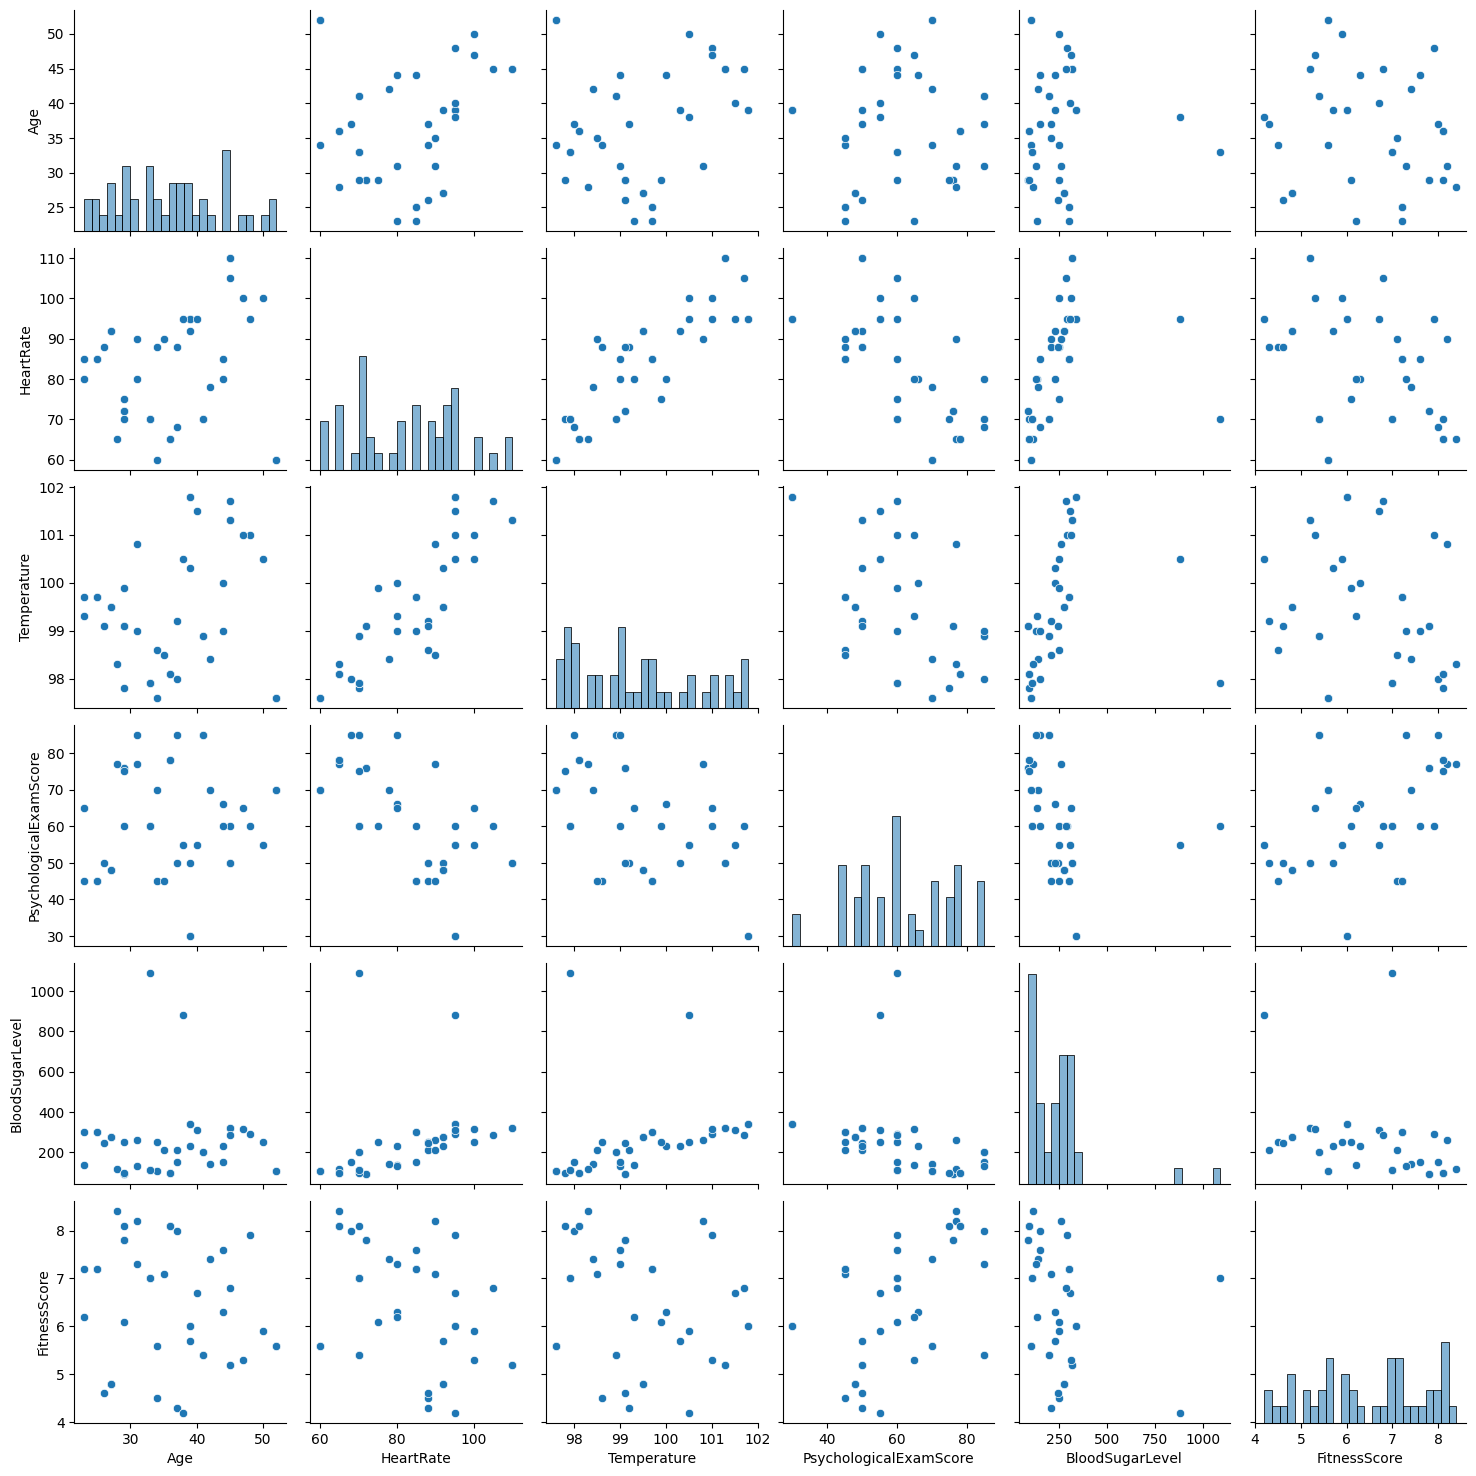

In [14]:
sns.pairplot(virus_df, diag_kws = {'alpha':0.55, 'bins':25})

Sklearn operations follow the same series of steps:

* select a preprocessing method and initialize object
* fit it through the fit() method
* apply fitted object to data through the transform() method
* or fit & transform at the same time: fit_transform()


## 1. Standardization ⚖️

Why it's important:

* Importance: Standardizing features by removing the mean and scaling to unit variance is important when features have different scales. Best for data that is normally distributed and/or with models that assume data follows Gaussian distribution (linear/logistic regression, SVM).
* Types of models: Models like Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and Principal Component Analysis (PCA) are sensitive to the scale of input features.
* Consequence of not scaling: If features are not scaled, models can give disproportionate importance to features with larger scales, leading to biased predictions.

Also helpful because std can be seen as a measure of practical significance. 

### A. Standard Scaler (standardization)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Let's scale the HeartRate feature

scaler = StandardScaler() # initialize scaler object
scaler

StandardScaler()

In [17]:
scaler.fit(
    np.array(virus_df['HeartRate']).reshape(-1, 1) # turn to one-dimensional series and reshape to a 2D array
)

StandardScaler()

In [18]:
# StandardScaler learns the mean and scale of the feature
# fitted values end with _
scaler.mean_

array([81.93333333])

In [19]:
scaler.scale_

array([13.62253036])

In [20]:
# use fitted scaler to transform values
scaler.transform(virus_df[['HeartRate']])

c:\Users\JayLynch\OneDrive - MCO\BL\bl-gitlab-projects\data-science-always-learning\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[ 0.44534066],
       [-0.72918416],
       [ 2.06031229],
       [-0.87599976],
       [ 0.73897187],
       [-0.14192175],
       [-1.61007777],
       [ 0.95919527],
       [ 0.22511726],
       [-1.24303877],
       [-0.87599976],
       [ 1.32623427],
       [ 0.44534066],
       [ 0.95919527],
       [-0.72918416],
       [ 0.95919527],
       [ 0.22511726],
       [ 2.06031229],
       [-1.24303877],
       [-0.87599976],
       [ 0.73897187],
       [-0.87599976],
       [-0.14192175],
       [-1.61007777],
       [ 0.59215626],
       [ 0.95919527],
       [-1.02281536],
       [-0.50896075],
       [-0.28873735],
       [ 1.32623427],
       [ 0.44534066],
       [ 0.59215626],
       [-1.24303877],
       [ 0.73897187],
       [-0.14192175],
       [ 1.69327328],
       [ 0.95919527],
       [-0.87599976],
       [ 0.22511726],
       [ 0.73897187],
       [-1.24303877],
       [-0.87599976],
       [ 0.22511726],
       [-1.61007777],
       [-0.87599976]])

In [21]:
## fitting StandardScaler and transforming values all at once for 2 columns
columns_to_scale = ["HeartRate", "Temperature"]


virus_df[columns_to_scale] = scaler.fit_transform(virus_df[columns_to_scale]) # double brackets returns dataframe instead of series that needs to be reshaped from 1D array

In [22]:
virus_df.head(10)

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,4.5,Yes
1,Zephyr Smith,Female,29.0,Scientist,-0.729184,-0.199349,76.0,90,7.8,No
3,Orion Taylor,Male,45.0,Miner,2.060312,1.531843,50.0,320,5.2,Yes
5,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,110,7.0,No
6,Vega Martin,Male,27.0,Miner,0.738972,0.115413,48.0,275,4.8,Yes
7,Callisto Clark,Female,44.0,Engineer,-0.141922,0.508866,66.0,230,6.3,No
8,Cetus Lewis,Other,52.0,Scientist,-1.610078,-1.379708,70.0,105,5.6,No
10,Hydra Allen,Male,39.0,Staff,0.959195,1.925296,30.0,340,6.0,Yes
11,Aurora King,Female,23.0,Miner,0.225117,0.272794,45.0,300,7.2,Yes
12,Cassiopeia Wright,Female,36.0,Scientist,-1.243039,-0.986255,78.0,95,8.1,No


### B. MinMaxScaler & MinAbsScaler 📐

Why it's important:

* Importance: Scaling features to a specific range (usually 0 to 1) ensures all features contribute equally (preserves relative differences-- if one value is twice as big as another, this relative difference will remain). Useful if data does not follow Gaussian distribution and has varying scales; also if algorithm used does not assume any distribution and relies on distance metrics (KNN). The motivation to use this scaling also includes robustness to very small standard deviations of features and preserving zero entries in sparse data.
* Types of models: Neural networks, KNN.
* Consequence of not scaling: Models may converge slowly or get stuck in local minima during training.

In [23]:
# Fitness score is definitely not normally distributed, so let's apply MinMaxScaler here

from sklearn.preprocessing import MinMaxScaler

In [24]:
mm_scaler = MinMaxScaler()
mm_scaler

MinMaxScaler()

In [25]:
# fit the mm scaler
mm_scaler.fit(virus_df[['FitnessScore']])

MinMaxScaler()

In [26]:
# view some params
print(mm_scaler.min_)
print(mm_scaler.n_samples_seen_)
print(mm_scaler.data_range_)
print(mm_scaler.data_max_)
print(mm_scaler.data_min_)

[-1.]
45
[4.2]
[8.4]
[4.2]


In [27]:
# let's fit and transform to data

virus_df['FitnessScore'].head(10)

0     4.5
1     7.8
3     5.2
5     7.0
6     4.8
7     6.3
8     5.6
10    6.0
11    7.2
12    8.1
Name: FitnessScore, dtype: float64

In [28]:
virus_df['FitnessScore'] = mm_scaler.fit_transform(virus_df[['FitnessScore']])

virus_df['FitnessScore'].describe()

count    45.000000
mean      0.537037
std       0.295405
min       0.000000
25%       0.285714
50%       0.595238
75%       0.761905
max       1.000000
Name: FitnessScore, dtype: float64

Nice! All the Fitness scores are between 0-1 now

### C. RobustScaler ⛏️

Why it's important:

* Importance: RobustScaler is used when the data contains significant outliers that could distort scaling process (large std)-- also want to focus on central tendency and spread of data. It scales the data according to the median and interquartile range.
* Types of models: Useful in any model where outliers might affect the learning process.
* Consequence of not scaling: Outliers can disproportionately influence the model, leading to poor performance.

<Axes: xlabel='BloodSugarLevel', ylabel='Count'>

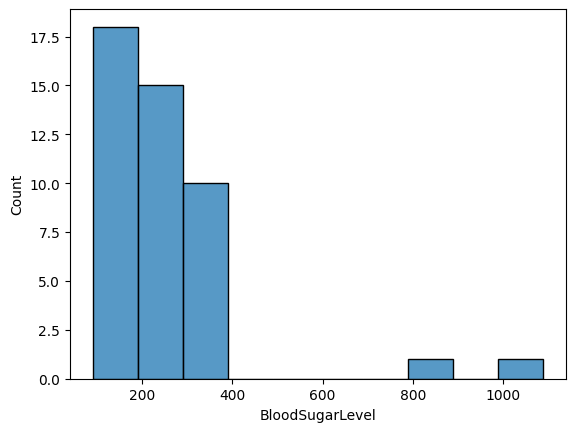

In [29]:
## let's see if the BloodSugar values contain outliers

sns.histplot(virus_df['BloodSugarLevel'])

Definitely outliers. Let's see what both the standard and minmax would do, then use robustscaler

In [30]:
from sklearn.preprocessing import RobustScaler

scaler_out = StandardScaler()
mm_out = MinMaxScaler()
robust_sc = RobustScaler()

<Axes: ylabel='Frequency'>

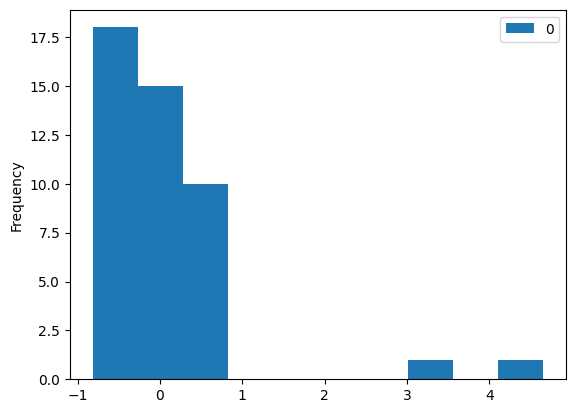

In [31]:
pd.DataFrame(scaler_out.fit_transform(virus_df[['BloodSugarLevel']])).plot(kind='hist')

This has compressed all the non-outlier values into a tight range between [-0.7, 0.7] potentially obfuscating important distinctions between levels and adversely affecting distance-based algorithms. 

<Axes: ylabel='Frequency'>

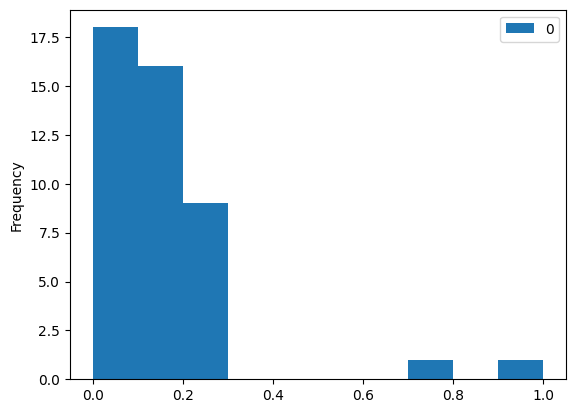

In [32]:
pd.DataFrame(mm_out.fit_transform(virus_df[['BloodSugarLevel']])).plot(kind='hist')

We see a similar effect here, but just within the range of the min max scaler.

<Axes: ylabel='Frequency'>

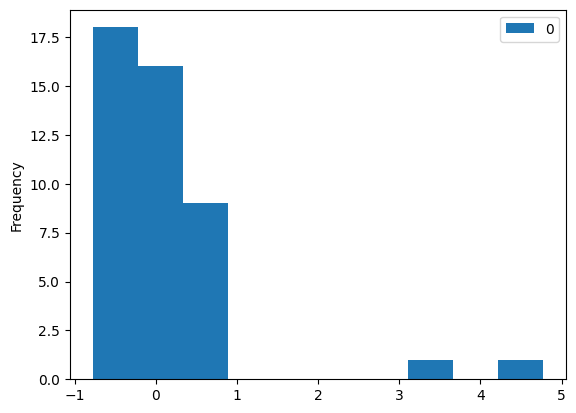

In [33]:
pd.DataFrame(robust_sc.fit_transform(virus_df[['BloodSugarLevel']])).plot(kind='hist')

Not a huge difference in the plot, but looking at the fitted values show the RobustScaler did resist some of the outlying values' influence. 

In [34]:
print('------------')
print(scaler_out.mean_)
print(robust_sc.center_)
print('------------')
print(scaler_out.scale_)
print(robust_sc.scale_)

------------
[239.44444444]
[230.]
------------
[182.55964694]
[180.]


Choosing the Right Scaler 📐

- **Start**: Begin the decision-making process.
- **Is your data normally distributed?**
  - Yes: Use StandardScaler
  - No:
    - **Does your data have significant outliers?**
      - Yes: Use RobustScaler
      - No:
        - **Is preserving feature relationships important?**
          - Yes: Use MinMaxScaler
          - No: Use RobustScaler

# 2. Encoding Categorical Features 📊



## A. OneHotEncoder 🔥

Why it's important:

* Importance: Converting categorical variables into binary vectors allows models to interpret categorical data.
* Types of models: Most machine learning models, particularly those based on linear algebra (like linear regression, logistic regression, and SVM).
* Consequence of not encoding: Models cannot handle categorical data directly, leading to errors or incorrect model interpretation.

Note: could also use pandas.get_dummies()

In [35]:
## Great example in our dataset is Occupation

virus_df.Occupation.unique()

array(['Miner', 'Scientist', 'Staff', 'Engineer', 'Medic'], dtype=object)

In [36]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False)

In [37]:
# fitting the one hot encoder
one_hot.fit(virus_df[['Occupation']])

OneHotEncoder(sparse_output=False)

In [38]:
# view estimator parameters
one_hot.get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'feature_name_combiner': 'concat',
 'handle_unknown': 'error',
 'max_categories': None,
 'min_frequency': None,
 'sparse_output': False}

In [39]:
# did it capture our categories?
one_hot.categories_

[array(['Engineer', 'Medic', 'Miner', 'Scientist', 'Staff'], dtype=object)]

In [40]:
one_hot.feature_names_in_ # original column feature name

array(['Occupation'], dtype=object)

In [41]:
one_hot.get_feature_names_out() # names of new columns, one for each new feature

array(['Occupation_Engineer', 'Occupation_Medic', 'Occupation_Miner',
       'Occupation_Scientist', 'Occupation_Staff'], dtype=object)

Let's see what the data will look like in updated dataframe

In [42]:
encoded_data = one_hot.fit_transform(virus_df[['Occupation']])

In [43]:
encoded_data

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0.

In [44]:
# Create DataFrame from encoded data with column names
encoded_df = pd.DataFrame(encoded_data, columns=one_hot.get_feature_names_out(['Occupation']))

In [45]:
encoded_df

,Occupation_Engineer,Occupation_Medic,Occupation_Miner,Occupation_Scientist,Occupation_Staff
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0


In [46]:
# Concatenate original DataFrame 'df' with encoded DataFrame 'encoded_df'
virus_enc_df = pd.concat([virus_df, encoded_df], axis=1)

In [47]:
virus_enc_df.drop('Occupation', axis=1).head(10)

,Name,Gender,Age,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus,Occupation_Engineer,Occupation_Medic,Occupation_Miner,Occupation_Scientist,Occupation_Staff
0,Aurora Johnson,Male,34.0,0.445341,-0.592802,45.0,250.0,0.071429,Yes,0.0,0.0,1.0,0.0,0.0
1,Zephyr Smith,Female,29.0,-0.729184,-0.199349,76.0,90.0,0.857143,No,0.0,0.0,0.0,1.0,0.0
3,Orion Taylor,Male,45.0,2.060312,1.531843,50.0,320.0,0.238095,Yes,0.0,0.0,0.0,0.0,1.0
5,Draco Harris,Male,33.0,-0.876000,-1.143636,60.0,110.0,0.666667,No,1.0,0.0,0.0,0.0,0.0
6,Vega Martin,Male,27.0,0.738972,0.115413,48.0,275.0,0.142857,Yes,0.0,0.0,0.0,1.0,0.0
7,Callisto Clark,Female,44.0,-0.141922,0.508866,66.0,230.0,0.500000,No,0.0,0.0,0.0,0.0,1.0
8,Cetus Lewis,Other,52.0,-1.610078,-1.379708,70.0,105.0,0.333333,No,0.0,0.0,1.0,0.0,0.0
10,Hydra Allen,Male,39.0,0.959195,1.925296,30.0,340.0,0.428571,Yes,1.0,0.0,0.0,0.0,0.0
11,Aurora King,Female,23.0,0.225117,0.272794,45.0,300.0,0.714286,Yes,0.0,0.0,0.0,0.0,1.0
12,Cassiopeia Wright,Female,36.0,-1.243039,-0.986255,78.0,95.0,0.928571,No,0.0,0.0,1.0,0.0,0.0


### OneHot parameters we can use:

* categories: manually provide a list of the categories we want to be created
* max_categories: upper limit to the number of output features (columns) for each input feature
* min_frequency: minimum frequency below which a category will be considered infrequent
* handle_unknown: specifies what to do with unknown categories during transform that weren't seen during fitting ('error', 'ignore', 'infrequent_if_exist')
* drop: drop one of the categories per feature-- useful when worried about collinear features (unregularized linear regression)

In [48]:
# Dropping the first value of Gender when encoding the values
one_hot2 = OneHotEncoder(drop='first', sparse_output=False)

gen_enc = one_hot2.fit_transform(virus_df[['Gender']])
# Create DataFrame from encoded data with column names
gen_enc_df = pd.DataFrame(gen_enc, columns=one_hot2.get_feature_names_out())

gen_enc_df.head(5)


,Gender_Male,Gender_Other
0,1.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [49]:
virus_df.Occupation.value_counts()

Occupation
Miner        13
Scientist    11
Staff        10
Engineer      6
Medic         5
Name: count, dtype: int64

In [50]:
# Putting minimum frequncy on categories during encoding & specifying to add to infrequent if a new category (e.g., 'Spacerock Thrower') appears in new data

one_hot3 = OneHotEncoder(sparse_output=False, min_frequency=8, handle_unknown='infrequent_if_exist')

occ_enc = one_hot3.fit_transform(virus_df[['Occupation']])
# Create DataFrame from encoded data with column names
occ_enc_df = pd.DataFrame(occ_enc, columns=one_hot3.get_feature_names_out())

occ_enc_df.head(5)

,Occupation_Miner,Occupation_Scientist,Occupation_Staff,Occupation_infrequent_sklearn
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


## B. OrdinalEncoder 

- Of less value as this will encode categorical values in an ordinal way (1,2,3,4,...) meaning algorithms will interpret the categories as ordered, which is often not desired.
- Will pass through missing values, and can also encode these values without needing to create pipeline

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
ord = OrdinalEncoder()

In [53]:
ord.get_params()

{'categories': 'auto',
 'dtype': numpy.float64,
 'encoded_missing_value': nan,
 'handle_unknown': 'error',
 'max_categories': None,
 'min_frequency': None,
 'unknown_value': None}

In [54]:
ord_enc = ord.fit_transform(virus_df[['Occupation']])



In [55]:
ord_enc_df = pd.DataFrame(data=ord_enc, columns=['occupation_ordered'])

In [56]:
ord_enc_df.head(10)

,occupation_ordered
0,2.0
1,3.0
2,2.0
3,4.0
4,2.0
5,0.0
6,3.0
7,4.0
8,2.0
9,3.0


In [57]:
virus_df.head(10)

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,0.071429,Yes
1,Zephyr Smith,Female,29.0,Scientist,-0.729184,-0.199349,76.0,90,0.857143,No
3,Orion Taylor,Male,45.0,Miner,2.060312,1.531843,50.0,320,0.238095,Yes
5,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,110,0.666667,No
6,Vega Martin,Male,27.0,Miner,0.738972,0.115413,48.0,275,0.142857,Yes
7,Callisto Clark,Female,44.0,Engineer,-0.141922,0.508866,66.0,230,0.500000,No
8,Cetus Lewis,Other,52.0,Scientist,-1.610078,-1.379708,70.0,105,0.333333,No
10,Hydra Allen,Male,39.0,Staff,0.959195,1.925296,30.0,340,0.428571,Yes
11,Aurora King,Female,23.0,Miner,0.225117,0.272794,45.0,300,0.714286,Yes
12,Cassiopeia Wright,Female,36.0,Scientist,-1.243039,-0.986255,78.0,95,0.928571,No


In [58]:
virus_df['occupation_ordered'] = ord_enc_df['occupation_ordered'].values # to avoid matching on index

In [59]:
virus_df.head(10)

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus,occupation_ordered
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,0.071429,Yes,2.0
1,Zephyr Smith,Female,29.0,Scientist,-0.729184,-0.199349,76.0,90,0.857143,No,3.0
3,Orion Taylor,Male,45.0,Miner,2.060312,1.531843,50.0,320,0.238095,Yes,2.0
5,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,110,0.666667,No,4.0
6,Vega Martin,Male,27.0,Miner,0.738972,0.115413,48.0,275,0.142857,Yes,2.0
7,Callisto Clark,Female,44.0,Engineer,-0.141922,0.508866,66.0,230,0.500000,No,0.0
8,Cetus Lewis,Other,52.0,Scientist,-1.610078,-1.379708,70.0,105,0.333333,No,3.0
10,Hydra Allen,Male,39.0,Staff,0.959195,1.925296,30.0,340,0.428571,Yes,4.0
11,Aurora King,Female,23.0,Miner,0.225117,0.272794,45.0,300,0.714286,Yes,2.0
12,Cassiopeia Wright,Female,36.0,Scientist,-1.243039,-0.986255,78.0,95,0.928571,No,3.0


## C. Label Encoder

Used for the learning TARGET variable rather than features-- helps normalize labels such that they contain only values between 0 and n_classes-1

In [61]:
from sklearn.preprocessing import LabelEncoder

In [63]:
virus_df.head(5)

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus,occupation_ordered
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,0.071429,Yes,2.0
1,Zephyr Smith,Female,29.0,Scientist,-0.729184,-0.199349,76.0,90,0.857143,No,3.0
3,Orion Taylor,Male,45.0,Miner,2.060312,1.531843,50.0,320,0.238095,Yes,2.0
5,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,110,0.666667,No,4.0
6,Vega Martin,Male,27.0,Miner,0.738972,0.115413,48.0,275,0.142857,Yes,2.0


In [66]:
lab_enc = LabelEncoder()

enc_target = lab_enc.fit_transform(virus_df[['HasVirus']].values.ravel())

enc_target

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0])

In [108]:
lab_enc.transform(["Yes", "Yes", "No"])

array([1, 1, 0])

In [151]:
virus_df['target_enc'] = lab_enc.transform(virus_df[['HasVirus']])

c:\Users\JayLynch\OneDrive - MCO\BL\bl-gitlab-projects\data-science-always-learning\venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [152]:
virus_df.head()

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus,occupation_ordered,age_bins,age_bins_pd,target_enc
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,0.071429,Yes,2.0,1.0,30s,1
1,Zephyr Smith,Female,29.0,Scientist,-0.729184,-0.199349,76.0,90,0.857143,No,3.0,1.0,<30,0
3,Orion Taylor,Male,45.0,Miner,2.060312,1.531843,50.0,320,0.238095,Yes,2.0,3.0,40s,1
5,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,110,0.666667,No,4.0,1.0,30s,0
6,Vega Martin,Male,27.0,Miner,0.738972,0.115413,48.0,275,0.142857,Yes,2.0,0.0,<30,1


# 3. Discretization 🗑️

 Quantization or binning provides a way to partition continuous features into discrete values. Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.

 Can help with overfitting (too granular of data), outliers (bin extreme values), interpretation (ages between 40-50), improve sparce data, and create useful features.

## KBinsDiscretizer

In [109]:
from sklearn.preprocessing import KBinsDiscretizer

In [116]:
# for example, maybe we want to bin ages into 4 groups

virus_df.Age.describe()

count    45.000000
mean     35.933333
std       7.915462
min      23.000000
25%      29.000000
50%      36.000000
75%      41.000000
max      52.000000
Name: Age, dtype: float64

In [117]:
bin_enc = KBinsDiscretizer(
    n_bins=4, #default is 5
    encode= "ordinal", # onehot
    strategy= "quantile" #uniform, kmeans
)

In [118]:
bin_enc.fit(virus_df[['Age']])

KBinsDiscretizer(encode='ordinal', n_bins=4)

In [119]:
virus_df['age_bins'] = bin_enc.transform(virus_df[['Age']])

In [120]:
virus_df.sample(10)

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus,occupation_ordered,age_bins
28,Cetus Phillips,Other,34.0,Scientist,-1.610078,-1.379708,70.0,105,0.333333,No,3.0,1.0
24,Vega Young,Male,27.0,Miner,0.738972,0.115413,48.0,275,0.142857,Yes,2.0,0.0
39,Vega Cook,Female,39.0,Miner,0.738972,0.744937,50.0,230,0.357143,Yes,2.0,2.0
43,Draco Rivera,Male,29.0,Scientist,-0.876000,-1.222327,75.0,95,0.928571,No,3.0,1.0
26,Lyra Walker,Female,23.0,Medic,-0.141922,-0.041968,65.0,135,0.476190,No,1.0,0.0
5,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,110,0.666667,No,4.0,1.0
15,Vega Baker,Female,37.0,Miner,0.445341,-0.120659,50.0,210,0.023810,Yes,2.0,2.0
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,0.071429,Yes,2.0,1.0
13,Nova Scott,Other,41.0,Engineer,-0.876000,-0.356731,85.0,200,0.285714,No,0.0,3.0
7,Callisto Clark,Female,44.0,Engineer,-0.141922,0.508866,66.0,230,0.500000,No,0.0,3.0


In [124]:
virus_df.groupby('age_bins')['Age'].describe().T

age_bins,0.0,1.0,2.0,3.0
count,9.000000,13.000000,10.000000,13.000000
mean,25.666667,31.769231,37.700000,45.846154
std,1.802776,2.204308,1.494434,3.760456
min,23.000000,29.000000,36.000000,41.000000
25%,25.000000,29.000000,36.250000,44.000000
50%,26.000000,33.000000,37.500000,45.000000
75%,27.000000,33.000000,39.000000,48.000000
max,28.000000,35.000000,40.000000,52.000000


In [140]:
# although with domain knowledge, pd.cut is often better to create bins

bin_labels = ["<30", "30s", "40s", "50+"]
cuts = [0,30,40,50,np.inf]

In [141]:
virus_df['age_bins_pd'] = pd.cut(virus_df.Age, bins=cuts, labels=bin_labels)

In [142]:
virus_df.sample(10)

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus,occupation_ordered,age_bins,age_bins_pd
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,0.071429,Yes,2.0,1.0,30s
13,Nova Scott,Other,41.0,Engineer,-0.876000,-0.356731,85.0,200,0.285714,No,0.0,3.0,40s
46,Cassiopeia Watson,Female,36.0,Scientist,-1.243039,-0.986255,78.0,95,0.928571,No,3.0,2.0,30s
31,Lyra Evans,Female,40.0,Staff,0.959195,1.689224,55.0,310,0.595238,Yes,4.0,2.0,30s
1,Zephyr Smith,Female,29.0,Scientist,-0.729184,-0.199349,76.0,90,0.857143,No,3.0,1.0,<30
38,Cetus Reed,Other,28.0,Scientist,-1.243039,-0.828874,77.0,115,1.000000,No,3.0,0.0,<30
51,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,1090,0.666667,No,4.0,1.0,30s
39,Vega Cook,Female,39.0,Miner,0.738972,0.744937,50.0,230,0.357143,Yes,2.0,2.0,30s
33,Nova Collins,Other,29.0,Engineer,-0.508961,0.430175,60.0,250,0.452381,No,0.0,1.0,<30
28,Cetus Phillips,Other,34.0,Scientist,-1.610078,-1.379708,70.0,105,0.333333,No,3.0,1.0,30s


# FunctionTransformer 🤖

Enables you to convert an existing Python function into a transformer to assist with data cleaning or processing.

In [146]:
from sklearn.preprocessing import FunctionTransformer

In [147]:
# let's create bins of determined size using pd.cut and FunctionTransformer

transformer = FunctionTransformer(
    pd.cut, kw_args={'bins': cuts, 'labels': bin_labels, 'retbins': False}
)
X = np.array([11, 47, 33, 108, 48])
transformer.fit_transform(X)

['<30', '40s', '30s', '50+', '40s']
Categories (4, object): ['<30' < '30s' < '40s' < '50+']

# Polynomial Features 🌊

Useful to add complexity to a model by considering nonlinear features of the input data, can also be useful in capturing non-linear relationships between the predictors and the target variable.

* Helpful if there is non-linearity between predictor and target.
* When simpler models (linear regression) are underfitting the data-- not learning enough

## PolynomialFeatures

In [148]:
from sklearn.preprocessing import PolynomialFeatures

In [153]:
virus_df.head(5)

,Name,Gender,Age,Occupation,HeartRate,Temperature,PsychologicalExamScore,BloodSugarLevel,FitnessScore,HasVirus,occupation_ordered,age_bins,age_bins_pd,target_enc
0,Aurora Johnson,Male,34.0,Miner,0.445341,-0.592802,45.0,250,0.071429,Yes,2.0,1.0,30s,1
1,Zephyr Smith,Female,29.0,Scientist,-0.729184,-0.199349,76.0,90,0.857143,No,3.0,1.0,<30,0
3,Orion Taylor,Male,45.0,Miner,2.060312,1.531843,50.0,320,0.238095,Yes,2.0,3.0,40s,1
5,Draco Harris,Male,33.0,Staff,-0.876000,-1.143636,60.0,110,0.666667,No,4.0,1.0,30s,0
6,Vega Martin,Male,27.0,Miner,0.738972,0.115413,48.0,275,0.142857,Yes,2.0,0.0,<30,1


<Axes: xlabel='target_enc', ylabel='FitnessScore'>

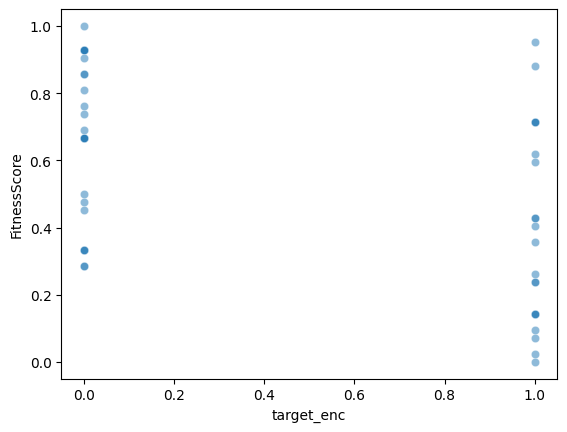

In [156]:
# Scatter plot with logistic regression curve

sns.scatterplot(x='target_enc', y='FitnessScore', data=virus_df, alpha=0.5)

In [166]:
poly_feat = PolynomialFeatures(
    degree=3,
    include_bias=False
)

In [167]:

pd.DataFrame(poly_feat.fit_transform(virus_df[['PsychologicalExamScore']])).head(5)

,0,1,2
0,45.0,2025.0,91125.0
1,76.0,5776.0,438976.0
2,50.0,2500.0,125000.0
3,60.0,3600.0,216000.0
4,48.0,2304.0,110592.0


## Spline Transformer

Advantages of polynomials:

* Very flexible and robust if you keep to low degree (3)
* Do not have oscillatory behavior at boundaries
* Good extrapolation beyond the boundaries

In [168]:
from sklearn.preprocessing import SplineTransformer

In [174]:
splines = SplineTransformer(
    n_knots = 3,
    degree = 2
)

In [175]:

pd.DataFrame(splines.fit_transform(virus_df[['PsychologicalExamScore']])).head(10)

,0,1,2,3
0,0.103306,0.747934,0.148760,0.000000
1,0.000000,0.053554,0.720165,0.226281
2,0.037190,0.698347,0.264463,0.000000
3,0.000000,0.413223,0.582645,0.004132
4,0.059669,0.726116,0.214215,0.000000
5,0.000000,0.238678,0.713554,0.047769
6,0.000000,0.148760,0.747934,0.103306
7,0.500000,0.500000,0.000000,0.000000
8,0.103306,0.747934,0.148760,0.000000
9,0.000000,0.032397,0.689752,0.277851


All done!